In [31]:
import pandas as pd

# 读取数据
data = pd.read_csv("../data/dataset.csv")
data

,O,N,SSA,PV,RMIC,Dap,ID/IG,M,Anion,AML,PW,CD,Cs
0,7.15,3.52,1546.1,0.5753,93.985747,1.488390,1.029,2,1,1.0,1.6,0.10,85.0
1,21.55,3.29,1140.8,0.8600,20.930233,3.015428,0.820,1,0,2.5,1.8,0.10,90.2
2,21.55,3.29,1140.8,0.8600,20.930233,3.015428,0.820,1,0,2.5,1.8,0.25,86.3
3,21.55,3.29,1140.8,0.8600,20.930233,3.015428,0.820,1,0,2.5,1.8,0.50,79.9
4,21.55,3.29,1140.8,0.8600,20.930233,3.015428,0.820,1,0,2.5,1.8,1.00,70.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,11.38,8.71,499.8,0.5043,20.488195,4.040000,1.070,2,1,3.0,1.6,1.00,90.1
596,11.38,8.71,499.8,0.5043,20.488195,4.040000,1.070,2,1,3.0,1.6,2.00,84.7
597,11.38,8.71,499.8,0.5043,20.488195,4.040000,1.070,2,1,3.0,1.6,5.00,75.5
598,11.38,8.71,499.8,0.5043,20.488195,4.040000,1.070,2,1,3.0,1.6,8.00,69.4


In [32]:
from sklearn.model_selection import train_test_split
data['target_class'] = pd.qcut(data['Cs'], q=10, labels=False)
X = data.drop(['Cs', 'target_class'], axis=1)
y = data['Cs']
stratify_column = data['target_class']

# 数据拆分
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=stratify_column)

# 线性回归 Linear Regression

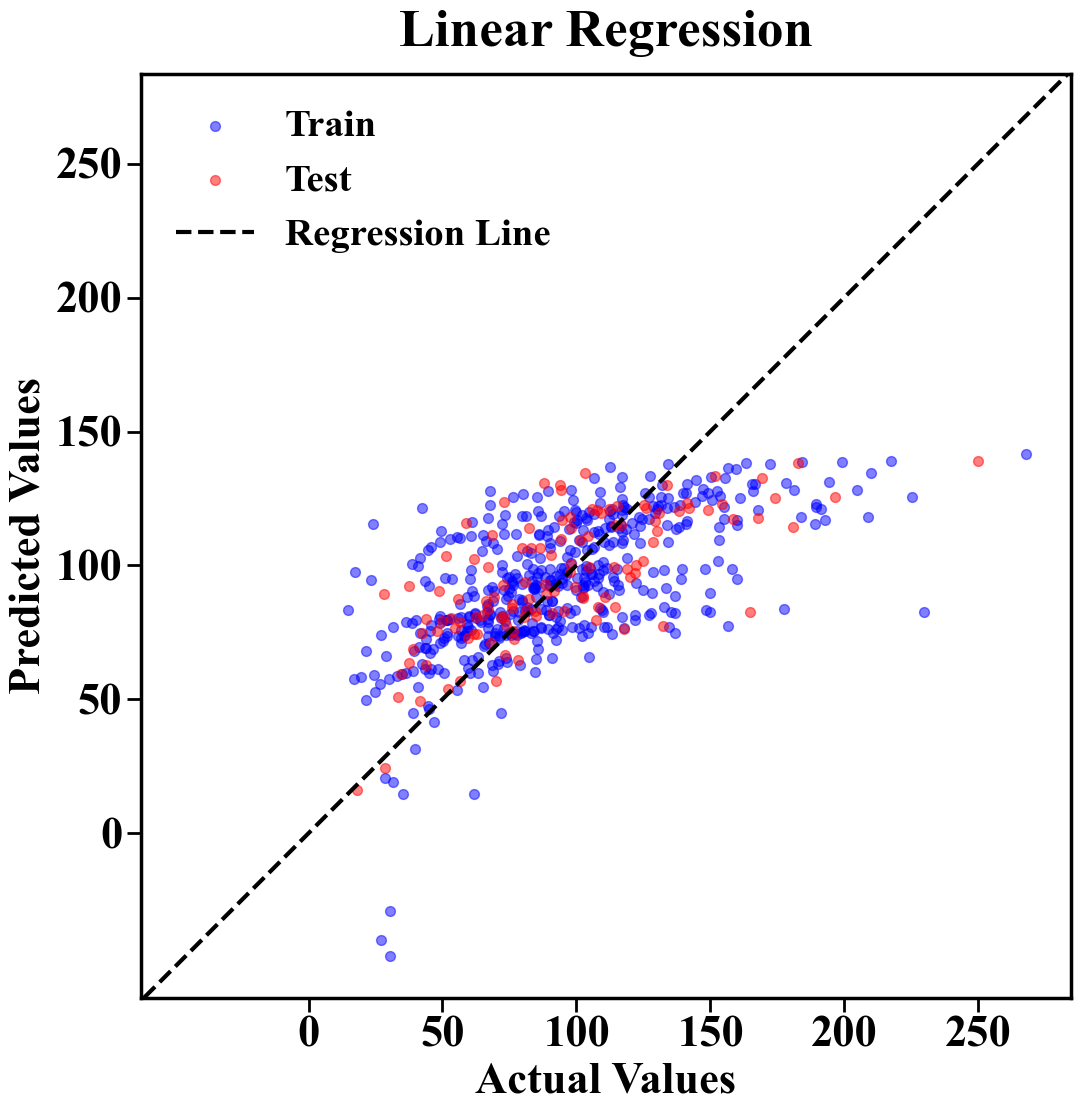

In [33]:
import numpy as np
from function import metrics_to_dataframe, plot_actual_vs_predicted
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

lr_metrics = metrics_to_dataframe(y_train, y_train_pred, y_test, y_test_pred, 'Linear Regression')
plot_actual_vs_predicted(y_train, y_train_pred, y_test, y_test_pred, 'Linear Regression','lr.png')

lr_train = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred})
lr_test = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
lr_train.to_csv('lr_train.csv', index=False)
lr_test.to_csv('lr_test.csv', index=False)

# 支持向量回归Support Vector Regression

[LibSVM]

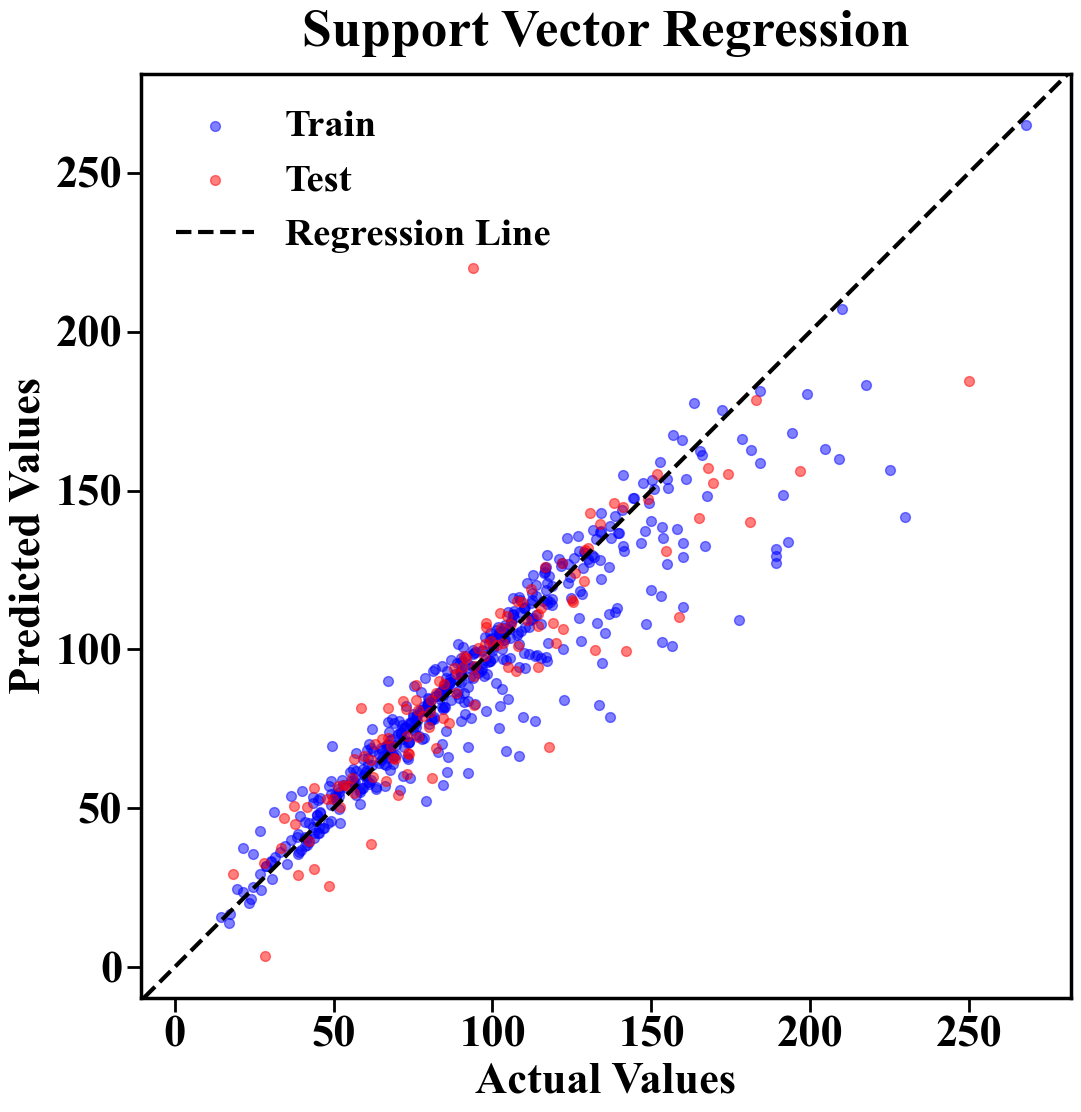

In [34]:
from sklearn.svm import SVR

# 针对SVR特点进行数据标准化
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svr = SVR(
    kernel='poly', 
    degree=7,
    gamma='scale',
    coef0=2,
    epsilon=3,
    verbose=True
)

svr.fit(X_train_scaled, y_train)

y_train_pred = svr.predict(X_train_scaled)
y_test_pred = svr.predict(X_test_scaled)

svr_metrics = metrics_to_dataframe(y_train, y_train_pred, y_test, y_test_pred, 'Support Vector Regression')
plot_actual_vs_predicted(y_train, y_train_pred, y_test, y_test_pred, 'Support Vector Regression', 'svr.png')

svr_train = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred})
svr_test = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
svr_train.to_csv('svr_train.csv', index=False)
svr_test.to_csv('svr_test.csv', index=False)

# 随机森林回归Random Forest Regression

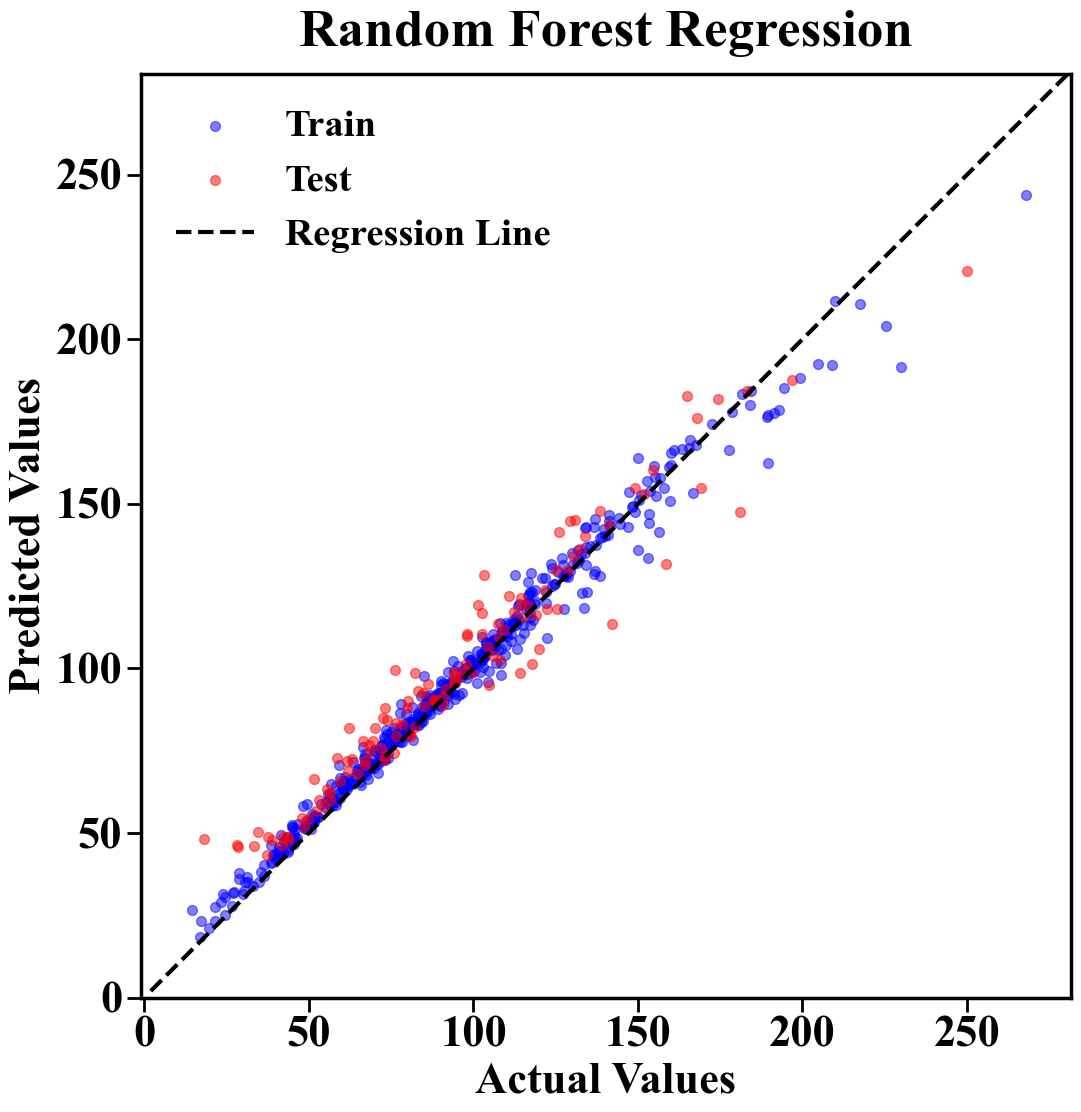

In [35]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=50,
                            max_depth=32,
                            min_samples_leaf=1,
                            min_samples_split=2,
                            max_features=1,
                            random_state=21)
rfr.fit(X_train, y_train)

y_train_pred = rfr.predict(X_train)
y_test_pred = rfr.predict(X_test)

rfr_metrics = metrics_to_dataframe(y_train, y_train_pred, y_test, y_test_pred, 'Randon Forest Regression')
plot_actual_vs_predicted(y_train, y_train_pred, y_test, y_test_pred, 'Random Forest Regression','rfr.png')

rfr_train = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred})
rfr_test = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
rfr_train.to_csv('rfr_train.csv', index=False)
rfr_test.to_csv('rfr_test.csv', index=False)

# 梯度提升回归Gradient Boosting Regression

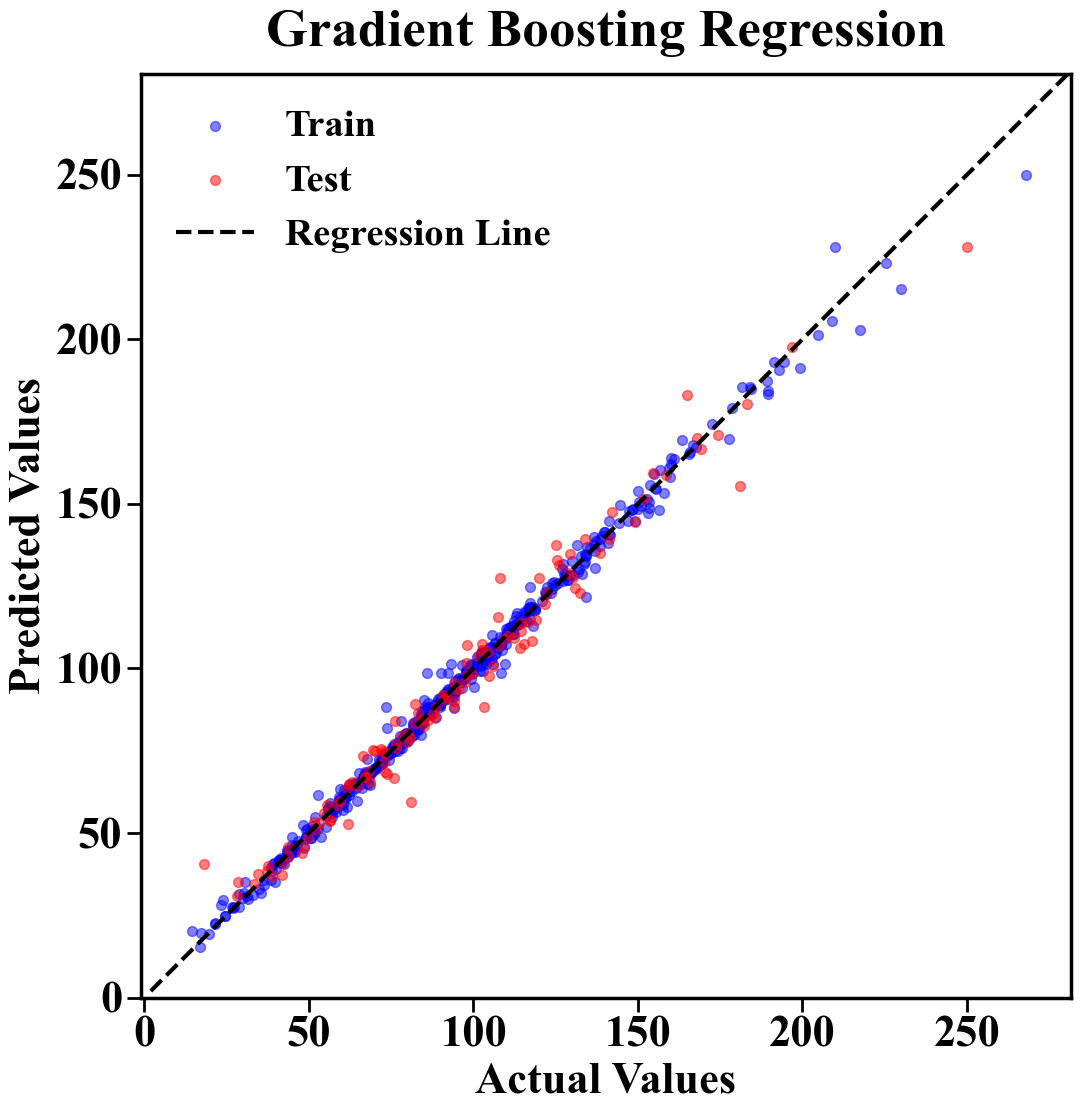

In [37]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=300,
                                learning_rate=0.06,
                                max_depth=12,
                                max_features=0.5,
                                min_samples_leaf=8,
                                min_samples_split=18,
                                subsample=0.7,
                                random_state=21)
gbr.fit(X_train, y_train)

y_train_pred = gbr.predict(X_train)
y_test_pred = gbr.predict(X_test)

gbr_metrics = metrics_to_dataframe(y_train, y_train_pred, y_test, y_test_pred, 'Gradient Boosting Regression')
plot_actual_vs_predicted(y_train, y_train_pred, y_test, y_test_pred, 'Gradient Boosting Regression','gbr.png')

gbr_train = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred})
gbr_test = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
gbr_train.to_csv('gbr_train.csv', index=False)
gbr_test.to_csv('gbr_test.csv', index=False)

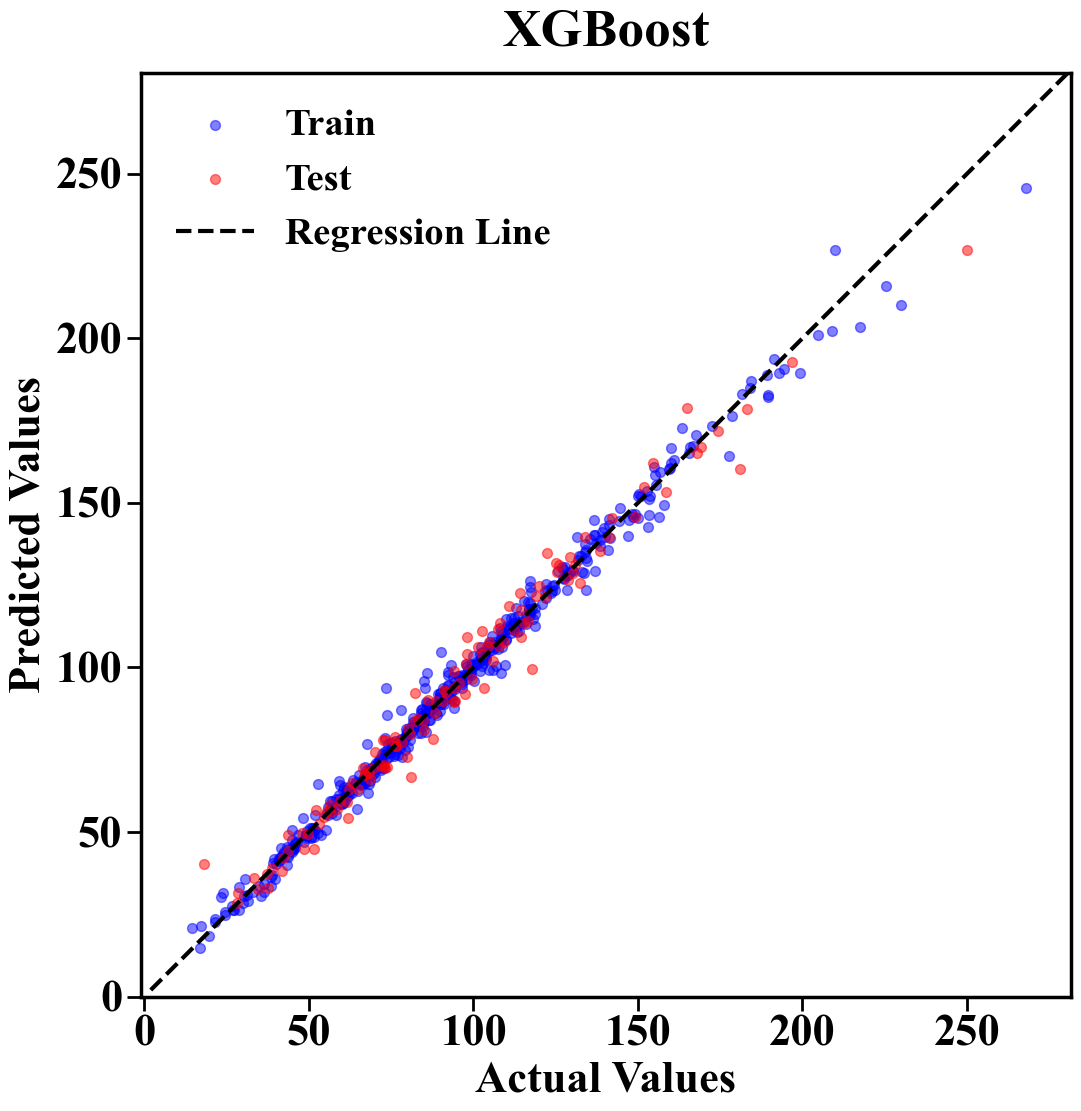

In [39]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=280,
                   learning_rate=0.09,
                   subsample=0.64,
                   gamma=0.3,
                   max_depth=18,
                   min_child_weight=9,
                   reg_alpha=0.5,
                   colsample_bytree=0.8,
                   colsample_bylevel=0.6,
                   colsample_bynode=0.6,
                   random_state=21)
xgb.fit(X_train, y_train)

y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

xgb_metrics = metrics_to_dataframe(y_train, y_train_pred, y_test, y_test_pred, 'XGBoost')
plot_actual_vs_predicted(y_train, y_train_pred, y_test, y_test_pred, 'XGBoost','XGB.png')

xgb_train = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred})
xgb_test = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
xgb_train.to_csv('xgb_train.csv', index=False)
xgb_test.to_csv('xgb_test.csv', index=False)

# LightGBM

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000121 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 474
[LightGBM] [Info] Number of data points in the train set: 480, number of used features: 12
[LightGBM] [Info] Start training from score 93.467937
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

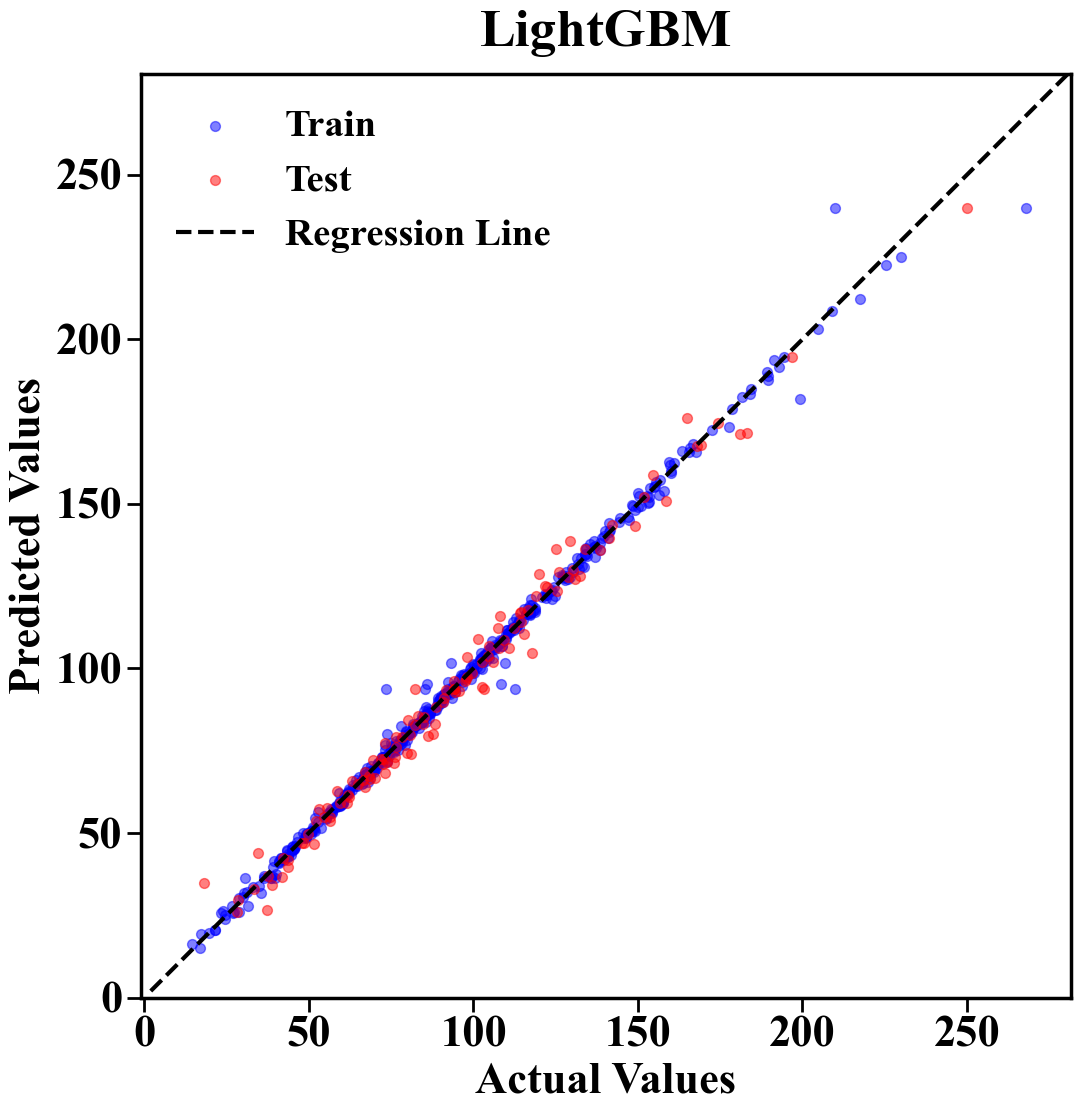

In [40]:
from lightgbm import LGBMRegressor

lgbm = LGBMRegressor(
    colsample_bytree=0.25,
    learning_rate=0.23,
    max_depth=25,
    min_child_samples=10,
    n_estimators=300,
    num_leaves=70,
    reg_alpha=0.45,
    reg_lambda=0.51,
    subsample=0.75,
    random_state=21
)

lgbm.fit(X_train, y_train)

y_train_pred = lgbm.predict(X_train)
y_test_pred = lgbm.predict(X_test)

lgbm_metrics = metrics_to_dataframe(y_train, y_train_pred, y_test, y_test_pred, 'LightGBM')
plot_actual_vs_predicted(y_train, y_train_pred, y_test, y_test_pred, 'LightGBM','LightGBM.png')

lgbm_train = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred})
lgbm_test = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
lgbm_train.to_csv('lgbm_train.csv', index=False)
lgbm_test.to_csv('lgbm_test.csv', index=False)

In [41]:
metrics = pd.concat([lr_metrics,svr_metrics, rfr_metrics, gbr_metrics, lgbm_metrics, xgb_metrics])
metrics_rounded = metrics.round(3)
metrics_rounded.to_markdown('report_models_old.md', index=False, tablefmt='github')
metrics_rounded

,model,R2_train,MAE_train,MAPE_train,RMSE_train,R2_test,MAE_test,MAPE_test,RMSE_test
0,Linear Regression,0.391,23.193,33.520,31.149,0.477,21.809,27.622,28.707
0,Support Vector Regression,0.869,8.404,8.728,14.422,0.779,10.910,12.891,18.647
0,Randon Forest Regression,0.982,3.771,4.846,5.416,0.926,8.212,11.584,10.776
0,Gradient Boosting Regression,0.995,1.823,2.248,2.946,0.974,4.146,5.404,6.425
0,LightGBM,0.995,1.288,1.561,2.919,0.986,3.377,4.623,4.772
0,XGBoost,0.991,2.454,3.054,3.827,0.978,3.979,5.078,5.869
